In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
IMAGE_SHAPE=(192,192)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_035_192/classification/5",input_shape=IMAGE_SHAPE+(3,))
])

In [5]:
data_dir="D:\\fire_detection"

In [6]:
img1=cv2.imread("D:\\fire_detection\\Fire\\fire1.jpg")
cv2.imshow("img",img1)
cv2.waitKey(0)
cv2.destroyAllWindows()
print("img",img1.shape)

img (236, 354, 3)


In [7]:
import pathlib

In [8]:
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('D:/fire_detection')

In [9]:
list(data_dir.glob('*/*.jpg'))[:2]

[WindowsPath('D:/fire_detection/Fire/fire1.jpg'),
 WindowsPath('D:/fire_detection/Fire/fire10.jpg')]

In [10]:
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

81


In [11]:
forest=list(data_dir.glob('nonfire/*'))
forest[:10]

[WindowsPath('D:/fire_detection/nonfire/a1.jpg'),
 WindowsPath('D:/fire_detection/nonfire/a10.jpg'),
 WindowsPath('D:/fire_detection/nonfire/a11.jpg'),
 WindowsPath('D:/fire_detection/nonfire/a12.jpg'),
 WindowsPath('D:/fire_detection/nonfire/a13.jpg'),
 WindowsPath('D:/fire_detection/nonfire/a14.jpg'),
 WindowsPath('D:/fire_detection/nonfire/a15.jpg'),
 WindowsPath('D:/fire_detection/nonfire/a16.jpg'),
 WindowsPath('D:/fire_detection/nonfire/a17.jpg'),
 WindowsPath('D:/fire_detection/nonfire/a18.jpg')]

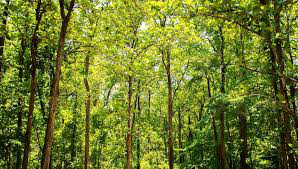

In [12]:
Image.open(str(forest[3]))

In [13]:
fire_images_dict={
    'fire':list(data_dir.glob('fire/*')),
    'nonfire':list(data_dir.glob('nonfire/*')),
    
}

In [14]:
fire_images_dict['fire']

[WindowsPath('D:/fire_detection/fire/fire1.jpg'),
 WindowsPath('D:/fire_detection/fire/fire10.jpg'),
 WindowsPath('D:/fire_detection/fire/fire11.jpg'),
 WindowsPath('D:/fire_detection/fire/fire12.jpg'),
 WindowsPath('D:/fire_detection/fire/fire13.jpg'),
 WindowsPath('D:/fire_detection/fire/fire14.jpg'),
 WindowsPath('D:/fire_detection/fire/fire15.jpg'),
 WindowsPath('D:/fire_detection/fire/fire16.jpg'),
 WindowsPath('D:/fire_detection/fire/fire17.jpg'),
 WindowsPath('D:/fire_detection/fire/fire18.jpg'),
 WindowsPath('D:/fire_detection/fire/fire19.jpg'),
 WindowsPath('D:/fire_detection/fire/fire2.jpg'),
 WindowsPath('D:/fire_detection/fire/fire20.jpg'),
 WindowsPath('D:/fire_detection/fire/fire21.jpg'),
 WindowsPath('D:/fire_detection/fire/fire22.jpg'),
 WindowsPath('D:/fire_detection/fire/fire23.jpg'),
 WindowsPath('D:/fire_detection/fire/fire24.jpg'),
 WindowsPath('D:/fire_detection/fire/fire25.jpg'),
 WindowsPath('D:/fire_detection/fire/fire26.jpg'),
 WindowsPath('D:/fire_detection/f

In [15]:
forest_labels_dict={
    
    'fire':0,
    'nonfire':1
    
}

In [16]:
img=str(fire_images_dict['fire'][0])

In [17]:
img=cv2.imread(img)
img.shape

(236, 354, 3)

In [18]:
cv2.resize(img,IMAGE_SHAPE).shape

(192, 192, 3)

In [19]:
x,y=[],[]

for fire,images in fire_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,IMAGE_SHAPE)
        x.append(resized_img)
        y.append(forest_labels_dict[fire])

In [20]:
x=np.array(x)
y=np.array(y)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [22]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

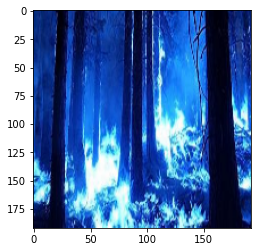

In [23]:
plt.imshow(x[20])

In [24]:
predicted=classifier.predict(np.array([x[0],x[1],x[2]]))
predicted=np.argmax(predicted,axis=1)
predicted

1/1 [==============================] - 1s 797ms/step


array([845, 905, 845], dtype=int64)

In [25]:
feature_extraction_model= "https://tfhub.dev/google/imagenet/mobilenet_v2_035_192/feature_vector/4"
pretrained_model_without_top_layer=hub.KerasLayer(
    feature_extraction_model,input_shape=(192,192,3),trainable=False
)

In [26]:
classes=2

model=tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(classes)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              410208    
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 412,770
Trainable params: 2,562
Non-trainable params: 410,208
_________________________________________________________________


In [27]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
2/2 [==============================] - 5s 224ms/step - loss: 0.9450 - acc: 0.4500
Epoch 2/10
2/2 [==============================] - 0s 212ms/step - loss: 0.7074 - acc: 0.6500
Epoch 3/10
2/2 [==============================] - 1s 245ms/step - loss: 0.5557 - acc: 0.7333
Epoch 4/10
2/2 [==============================] - 1s 255ms/step - loss: 0.4375 - acc: 0.8167
Epoch 5/10
2/2 [==============================] - 0s 223ms/step - loss: 0.3472 - acc: 0.8833
Epoch 6/10
2/2 [==============================] - 0s 223ms/step - loss: 0.2725 - acc: 0.9000
Epoch 7/10
2/2 [==============================] - 0s 227ms/step - loss: 0.2176 - acc: 0.9333
Epoch 8/10
2/2 [==============================] - 0s 215ms/step - loss: 0.1813 - acc: 0.9500
Epoch 9/10
2/2 [==============================] - 0s 201ms/step - loss: 0.1561 - acc: 0.9667
Epoch 10/10
2/2 [==============================] - 0s 214ms/step - loss: 0.1352 - acc: 0.9667


In [28]:
model.evaluate(x_test_scaled,y_test)

1/1 [==============================] - 1s 839ms/step - loss: 0.2536 - acc: 0.9048


[0.2536180019378662, 0.9047619104385376]

In [35]:
import joblib
import json
import numpy as np
import base64
import cv2


__class_name_to_number = {}
__class_number_to_name = {}

__model = None

def classify_image(image_base64_data, file_path=None):
    
    

    img = get_cropped_image_if_2_eyes(file_path,image_base64_data)
    
    
        
        
        
    scaling=cv2.resize(img,IMAGE_SHAPE)
    x=scaling/255






    ans=model.predict(np.array([x]))
    print(ans)
    predicted=np.argmax(ans,axis=1)
    predicted
    res=[]
    print("predict",predicted)

    for i in forest_labels_dict:
        if(predicted==forest_labels_dict[i]):
            
            res.append({
                'class':i,
                'class_probability':ans,
                'class_dictionary': forest_labels_dict
            })
            
            
            return res



def class_number_to_name(class_num):
    return __class_number_to_name[class_num]

def load_saved_artifacts():
    print("loading saved artifacts...start")
    global __class_name_to_number
    global __class_number_to_name

    with open("D:\\Rangers\\artifacts\\forest_labels_dict.json", "r") as f:
        __class_name_to_number = json.load(f)
        __class_number_to_name = {v:k for k,v in __class_name_to_number.items()}

    global __model
    if __model is None:
        with open('D:\\Rangers\\artifacts\\saved_model.pkl', 'rb') as f:
            __model = model
    print("loading saved artifacts...done")


def get_cv2_image_from_base64_string(b64str):
    '''
    credit: https://stackoverflow.com/questions/33754935/read-a-base-64-encoded-image-from-memory-using-opencv-python-library
    :param uri:
    :return:
    '''
    
    encoded_data = b64str
    
    nparr = np.frombuffer(base64.b64decode(encoded_data), np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    print("shape",img.shape)
    
    return img

def get_cropped_image_if_2_eyes(image_path, image_base64_data):


    if image_path:
        img = cv2.imread(image_path)
    else:
        img = get_cv2_image_from_base64_string(image_base64_data)
        
    return img

    

def get_b64_virat():
    with open("D://Rangers//b64.txt") as f:
        return f.read()

if __name__ == '__main__':
    load_saved_artifacts()

    print(classify_image(get_b64_virat(),None))

loading saved artifacts...start
loading saved artifacts...done
shape (188, 268, 3)
1/1 [==============================] - 0s 28ms/step
[[-1.0114764  3.3458586]]
predict [1]
[{'class': 'nonfire', 'class_probability': array([[-1.0114764,  3.3458586]], dtype=float32), 'class_dictionary': {'fire': 0, 'nonfire': 1}}]


In [30]:
from flask import Flask,request,jsonify

In [31]:
import utils

In [36]:
app=Flask(__name__)
@app.route('/classify_image',methods=['GET','POST'])
def classify_image():
    image_data=request.form['image_data']
    response=jsonify(classify_image(image_data))
    response.headers.add('Access-Control-Allow-Origin','*')
    return response

if __name__=="__main__":
    load_saved_artifacts()
    app.run(port=5000)

loading saved artifacts...start
loading saved artifacts...done
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
INFO:werkzeug:127.0.0.1 - - [05/Nov/2022 10:56:52] "GET / HTTP/1.1" 404 -
